In [2]:
# Initialisation
%matplotlib inline 
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl
from __future__ import division # enables division of integers to be floating points in python 2
from mpl_toolkits.mplot3d import Axes3D
import pylab

# 1. Functions

## 1.1 Compromise programming function

Function to calculate compromise programming distance according to Ballestero 2007 method

In [3]:
def cpdistance(objweights, normobjs, filename):
    n200 = len(objweights)/200
    results = {}
    for i in objweights.index:
        weight = objweights[i]
        column = normobjs[i]
        objdistance = n200*weight*(1-column) + 0.5*n200*weight*(1-n200*weight)*(1-column)**2
        results[i] = objdistance
    distance = sum(results.itervalues())
    results = pd.DataFrame(distance, columns = ['%s Distance' % filename])
    return results

# Find point of minimum distance
def cpmindist(distance):
    cpmindistpoint = distance.idxmin()
    return cpmindistpoint

## 1.2 Scatterplot function

Function to scatterplot compromise programming results

In [4]:
def scatterplot(results, cpmindistpoint, obj1, obj2, obj3, obj1name, obj2name, obj3name, objweights, filename): 
    scatcol = []
    for i in range(0, len(results)):
        scatcol.append("black")
    scatcol[int(cpmindistpoint)] = ("red")
    
    fig = plt.figure(figsize = [7,7])
    ax = Axes3D(fig)

    ax.scatter(abs(obj1), abs(obj2), abs(obj3), c = scatcol) # absolute values to remove negations
    ax.set_xlabel(obj1name, labelpad = 10)
    ax.set_ylabel(obj2name, labelpad = 10)
    ax.set_zlabel(obj3name, labelpad = 10)
    #If title is wanted: ax.set_title('Compromise Programming with %d%s weight on %s, %d%s weight on %s, and %d%s weight on %s' \
        #% (objweights[obj1name], '%', obj1name, objweights[obj2name], '%', obj2name, objweights[obj3name], '%', obj3name))
    pngfilename = '%s.png' % (filename)
    return plt.savefig(pngfilename, dpi=150, bbox_inches='tight')

# 2. User Input

## 2.1 Import Pareto set

Enter objective functions

In [5]:
obj1 = pd.read_pickle("Data/obj1")
obj2 = pd.read_pickle("Data/obj2")
obj3 = pd.read_pickle("Data/obj3")

In [6]:
objdf = pd.read_pickle("Data/objdf")

Enter 1-normalised objective function results, and objective names from these

In [7]:
onenormobjdf = pd.read_pickle("Data/onenormobjdf")

In [8]:
obj1name = obj1.name
obj2name = obj2.name
obj3name = obj3.name

## 2.2 Format chart names

Objective names for charts (including arrows for direction of preference)

In [9]:
obj1chartname = 'Minimum Storage (GL) %s' % r'$\longrightarrow$'
obj2chartname = '%s Total Cost (%s million)' % (r'$\longleftarrow$', r'$\$$')
obj3chartname = '%s Total Spill (GL)' % r'$\longleftarrow$'

## 2.3 Enter weights for compromise programming

Enter objective weights for objectives 1 and 2 (objective 3 automatically determined)

In [10]:
obj1weights = [30, 60, 20, 33.33]
obj2weights = [40, 30, 50, 33.33]

# 3. Execution: Processing, Compromise Programming and Output

## 3.1 Create dataframe of weights

Determine objective 3 weights and create dataframe of weights

In [11]:
obj3weights = []

for i in range(0, len(obj1weights)):
    obj3weights.append(100 - obj1weights[i] - obj2weights[i])

objweightsdict = {obj1name: obj1weights, obj2name: obj2weights, obj3name: obj3weights}
weights = pd.DataFrame(objweightsdict)

## 3.2 Compromise programming

Determine CP min distance for each set of weights

In [12]:
allresults = None

for i in range(0, len(weights)):
    title = '%d%s %s, %d%s %s, %d%s %s' \
        % (weights[obj1name][i],'%',obj1name,weights[obj2name][i],'%',obj2name,weights[obj3name][i],'%',obj3name)
    objweights = weights.ix[i]
    results = cpdistance(objweights, onenormobjdf, title) # calculating distance
    if allresults is None:
        allresults = results
    else:
        allresults = allresults.join(results)
        
    cpmindistpoint = cpmindist(results)
    
    print("Minimum distance point for weight of %s:" % (title), abs(objdf.ix[cpmindistpoint]))
    
    scatterplot(results, cpmindistpoint, obj1, obj2, obj3, obj1chartname, obj2chartname, obj3chartname, weights.ix[i], 'Compromise Programming/%s' % title)
    plt.close() #delete this line to plot inline
allresults.to_csv('Compromise Programming/Compromise Programming Results.csv')

('Minimum distance point for weight of 30% Minimum System Storage (GL), 40% Total Cost ($ million), 30% Total Spill Volume (GL):',      Minimum System Storage (GL)  Total Cost ($ million)  \
471                   330.012132             5181.141336   

     Total Spill Volume (GL)  
471               327.680565  )
('Minimum distance point for weight of 60% Minimum System Storage (GL), 30% Total Cost ($ million), 10% Total Spill Volume (GL):',      Minimum System Storage (GL)  Total Cost ($ million)  \
672                    359.05769             5200.568572   

     Total Spill Volume (GL)  
672               357.311418  )
('Minimum distance point for weight of 20% Minimum System Storage (GL), 50% Total Cost ($ million), 30% Total Spill Volume (GL):',      Minimum System Storage (GL)  Total Cost ($ million)  \
471                   330.012132             5181.141336   

     Total Spill Volume (GL)  
471               327.680565  )
('Minimum distance point for weight of 33% Minimum Syst

## 3.3 Scatterplot selected preference scenarios on one plot

Select scenarios

In [13]:
scenario1 = allresults[allresults.columns[0]].idxmin()
scenario2 = allresults[allresults.columns[1]].idxmin()

scenario1name = 'Weights: %d%s Minimum Storage, %d%s Total Cost, %d%s Total Spill'  % (weights.ix[0,0],'%',weights.ix[0,1],'%',weights.ix[0,2],'%')
scenario2name = 'Weights: %d%s Minimum Storage, %d%s Total Cost, %d%s Total Spill'  % (weights.ix[1,0],'%',weights.ix[1,1],'%',weights.ix[1,2],'%')

Scatterplot showing two scenarios from above results

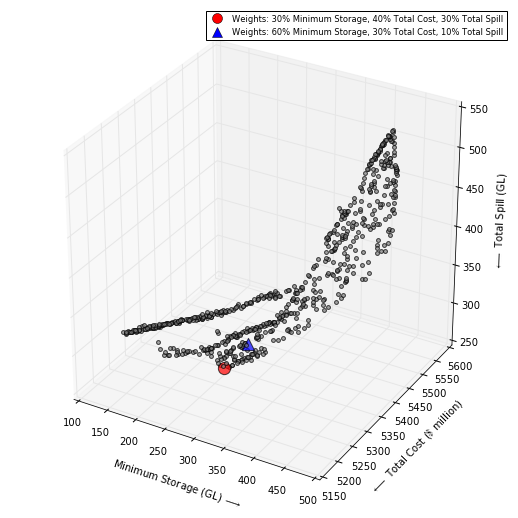

In [16]:
# create categories of colours for plotting and highlighting results
scatcol = []
for i in range(0, len(obj1)):
    scatcol.append("gray")
scatcol[scenario1] = ("red")
scatcol[scenario2] = ("blue")
    
fig = plt.figure(figsize = [7,7])
ax = Axes3D(fig)

category = {}
for i in range(0, len(obj1)):
    if i == scenario1:
        category[i] = 1
    elif i == scenario2:
        category[i] = 2
    else:
        category[i] = 0
markers = {0:'.', 1:'o', 2: '^'}
size = {0:60, 1:150, 2:150}

for i in category:
    ax.scatter(obj1[i], obj2[i], obj3[i], s = size[category[i]], c = scatcol[i], marker = markers[category[i]], alpha = 0.7)

ax.set_xlabel(obj1chartname, labelpad = 10)
ax.set_ylabel(obj2chartname, labelpad = 10)
ax.set_zlabel(obj3chartname, labelpad = 10)

red = mpl.lines.Line2D([0],[0], marker = 'o', ms = 10, color = 'red', 
                       linestyle = 'none')
blue = mpl.lines.Line2D([0], [0], marker = '^', ms = 10, color = 'blue',
                        linestyle = 'none')
ax.legend((red, blue), (scenario1name, scenario2name), 
          numpoints = 1, loc = 'upper right', fontsize = 'small')

#save file (check/uncheck to save)
#plt.savefig('Compromise Programming/Two scenario compromise scatterplot.png', dpi=150, bbox_inches = 'tight')
#plt.savefig('Compromise Programming/Two scenario compromise scatterplot.eps', bbox_inches = 'tight')

In [17]:
plt.close(fig)